# OCR machine learning

## Build model

In [13]:
import tensorflow as tf
from matplotlib import pyplot
%matplotlib inline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D

height = 13
width = 10

model = Sequential()
model.add(Conv2D(32, (3,3), activation = 'relu',input_shape=(height, width, 1)))
#model.add(MaxPooling2D((2, 2)))
#model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(255, activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 11, 8, 32)         320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 5, 4, 32)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 3, 2, 64)          18496     
                                                                 
 flatten_2 (Flatten)         (None, 384)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                24640     
                                                                 
 dense_5 (Dense)             (None, 255)               16575     
                                                      

## Load data

### Data from MNIST

In [ ]:
from tensorflow.keras.datasets import mnist
(train_images, y_train), (test_images, y_test) = mnist.load_data(path="mnist.npz")

#plot images
for i in range(9):
    #define subplot
    pyplot.subplot(330 + 1 + i)
    #plot raw pixel data
    pyplot.imshow(train_images[i], cmap=pyplot.get_cmap('gray'))

#show the figure
pyplot.show()

print('Train: Images=%s, Labels=%s' % (train_images.shape, y_train.shape))
print('Test: Images=%s, Labels=%s' % (test_images.shape, y_test.shape))

x_train = train_images.reshape(train_images.shape[0], 28, 28, 1)
x_test = test_images.reshape(test_images.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255


### Custom data

In [1]:
!tar -xzf data.tar.gz
!ls -al data

total 416
drwxrwxr-x. 1 1000 1000 1768 Mar 22 18:13 .
drwxrwxrwx. 1 root root  150 Mar 23 14:05 ..
-rw-rw-r--. 1 1000 1000  668 Mar 22 18:13 A.png
-rw-rw-r--. 1 1000 1000  284 Mar 22 18:13 A_result.png
-rw-rw-r--. 1 1000 1000  681 Mar 22 18:13 B.png
-rw-rw-r--. 1 1000 1000  281 Mar 22 18:13 B_result.png
-rw-rw-r--. 1 1000 1000  624 Mar 22 18:13 C.png
-rw-rw-r--. 1 1000 1000  249 Mar 22 18:13 C_result.png
-rw-rw-r--. 1 1000 1000  632 Mar 22 18:13 D.png
-rw-rw-r--. 1 1000 1000  238 Mar 22 18:13 D_result.png
-rw-rw-r--. 1 1000 1000  557 Mar 22 18:13 E.png
-rw-rw-r--. 1 1000 1000  197 Mar 22 18:13 E_result.png
-rw-rw-r--. 1 1000 1000  510 Mar 22 18:13 F.png
-rw-rw-r--. 1 1000 1000  162 Mar 22 18:13 F_result.png
-rw-rw-r--. 1 1000 1000  682 Mar 22 18:13 G.png
-rw-rw-r--. 1 1000 1000  298 Mar 22 18:13 G_result.png
-rw-rw-r--. 1 1000 1000  494 Mar 22 18:13 H.png
-rw-rw-r--. 1 1000 1000  148 Mar 22 18:13 H_result.png
-rw-rw-r--. 1 1000 1000  535 Mar 22 18:13 I.png
-rw-rw-r--. 1 1000 1000  176 

In [11]:
import os
import numpy as np
import matplotlib.image as mpimg
from pathlib import Path

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

# Path to the data directory
data_dir = Path("./data/")

# Get list of all the images
images_paths = sorted(list(map(str, list(data_dir.glob("*_result.png")))))

labels = [ord(image_path.split(os.path.sep)[-1].split("_result.png")[0]) for image_path in images_paths]
images = [rgb2gray(mpimg.imread(image_path)) for image_path in images_paths]

print(np.array(images).shape)

def split_data(images, labels, train_size=0.95, shuffle=True):
    # 1. Get the total size of the dataset
    size = len(images)
    # 2. Make an indices array and shuffle it, if required
    indices = np.arange(size)
    if shuffle:
        np.random.shuffle(indices)
    # 3. Get the size of training samples
    train_samples = int(size * train_size)
    # 4. Split data into training and validation sets
    x_train, y_train = images[indices[:train_samples]], labels[indices[:train_samples]]
    x_test, y_test = images[indices[train_samples:]], labels[indices[train_samples:]]
    return x_train, x_test, y_train, y_test


# Splitting data into training and validation sets
x_train, x_test, y_train, y_test = split_data(np.array(images), np.array(labels))

print('Train: Images=%s, Labels=%s' % (x_train.shape, y_train.shape))
print('Valid: Images=%s, Labels=%s' % (x_test.shape, y_test.shape))


(52, 13, 10)
Train: Images=(49, 13, 10), Labels=(49,)
Valid: Images=(3, 13, 10), Labels=(3,)


## Train model

In [14]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5)
test_loss, test_acc = model.evaluate(x_test, y_test)

Epoch 1/5
2/2 [==============================] - 1s 49ms/step - loss: 5.5429 - accuracy: 0.0000e+00
Epoch 2/5
2/2 [==============================] - 0s 21ms/step - loss: 5.4986 - accuracy: 0.0000e+00
Epoch 3/5
2/2 [==============================] - 0s 24ms/step - loss: 5.4546 - accuracy: 0.0204
Epoch 4/5
2/2 [==============================] - 0s 32ms/step - loss: 5.3961 - accuracy: 0.0204
Epoch 5/5
1/1 [==============================] - 0s 226ms/step - loss: 5.6700 - accuracy: 0.0000e+00


## Check predictions

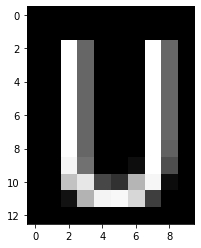

b


In [21]:
image_index = 1 #############
pyplot.imshow(x_test[image_index].reshape(height, width),cmap='Greys')
pyplot.show()
predict = x_test[image_index].reshape(height,width)
pred = model.predict(x_test[image_index].reshape(1, height, width, 1))
print(chr(pred.argmax()))


## Regularization

This regularization is popularly known as weight decay as it forces the weights to decay towards zero (but not exactly zero). This strategy drives the weights closer to the origin by adding the regularization term omega which is defined as:
$$
cost = loss + \frac{\lambda}{2m} \sum ||\omega||^2
$$

In [22]:
from tensorflow.keras import regularizers
model = Sequential()
model.add(Conv2D(32, (3,3), activation = 'relu',input_shape=(height, width, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model.add(Dense(10,activation='softmax', kernel_regularizer=regularizers.l2(0.0001)))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train,train_labels, epochs=5)
test_loss, test_acc = model.evaluate(x_test, test_labels)

ValueError: One of the dimensions in the output is <= 0 due to downsampling in conv2d_11. Consider increasing the input size. Received input shape [None, 1, 1, 64] which would produce output shape with a zero or negative value in a dimension.

## Dropout ???

Dropout is another interesting regularization technique. At every iteration, it randomly selects some nodes and removes them along with all of their incoming and outgoing connections so each iteration has a different set of nodes and this results in a different set of outputs.

In [ ]:
from keras.layers import Dropout
model = Sequential()
model.add(Conv2D(32, (3,3), activation = 'relu',input_shape=(height, width, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model.add(Dense(10,activation='softmax', kernel_regularizer=regularizers.l2(0.0001)))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train,train_labels, epochs=5)
test_loss, test_acc = model.evaluate(x_test, test_labels)

## Data augmentation

The simplest way to reduce overfitting is to increase the size of the training data. In this case, there are a few ways of increasing the size of the training data –rotating the image, flipping, scaling, shifting, etc.

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rotation_range=40,
                            width_shift_range=0.2,
                            height_shift_range=0.2,
                            shear_range=0.2,
                            zoom_range=0.2,
                            horizontal_flip=True,
                            fill_mode='nearest')
train_datagen.fit(x_train)

model = Sequential()
model.add(Conv2D(32, (3,3), activation = 'relu',input_shape=(height, width, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train,train_labels, epochs=5)
test_loss, test_acc = model.evaluate(x_test, test_labels)

## Early stopping

Early stopping is a type of cross-validation strategy where we keep one part of the training set as the validation set. When we see that the performance on the validation set is getting worse, we immediately stop the training on the model.

In [ ]:
from keras.callbacks import EarlyStopping
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train,train_labels, epochs=5, validation_data =(x_test, test_labels),
callbacks = [EarlyStopping(monitor = 'val_accuracy', patience = 2)])